#### Customer Churn Analysis Prediction with Python

##### This project intends to analyze churn to help X business understand why customers leave and how to improve retention. High churn rates can affect revenue and business growth. By analyzing churn patterns a bussiness can take steps to retain customers.



In [1]:
# Importing libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Telco-Customer-Churn.csv')

dataset.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Understanding the dataset
print(dataset.describe())
print(dataset.isnull().sum())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Churn
No     5174
Yes    1869
Name: count, dtype: int64


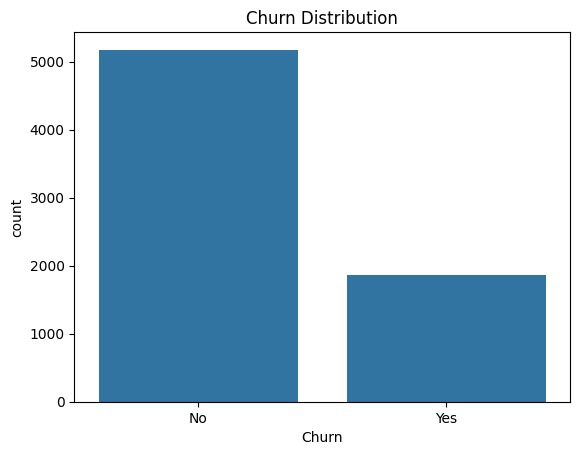

In [10]:
# Analysing churn distribution
sns.countplot(x='Churn', data=dataset)
plt.title('Churn Distribution')
# Get the count of each class
churn_counts = dataset['Churn'].value_counts()
print(churn_counts)

In [11]:
# Data Preprocessing

# Handling missing values and incorrect values
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce') # Convert to numeric, setting errors to NaN
dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True) # Fill NaN with median


# Handling categorical variables
from sklearn.preprocessing import LabelEncoder # To convert categorical variables to numerical

# Initialize LabelEncoder
Label_encoder = LabelEncoder()
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


# Iterate through the categorical features and apply label encoding/fit_transform
for feature in categorical_features:
    dataset[feature] = Label_encoder.fit_transform(dataset[feature])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_47252\878551750.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True) # Fill NaN with median


In [12]:
# Feature selection and splitting data
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['customerID', 'Churn']) # Features
y = dataset['Churn'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Splitting the data

In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler # To standardize features by removing the mean and scaling to unit variance

# Initialize StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # Fit to data, then transform it
X_test = scaler.transform(X_test) # Perform standardization by centering and scaling

In [15]:
# Model Training and Prediction
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 78.42%


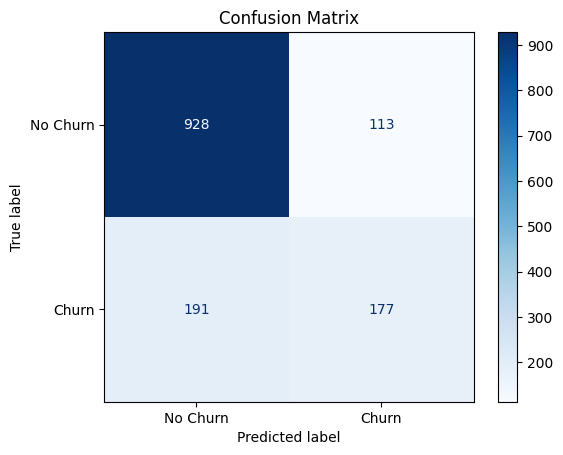

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()